In [1]:
import pandas as pd
import numpy as np
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# reading the text file with the predicted segmentation limits

file1 = open('125d7ce5a0bbcefe93cd1d157d668988.txt', 'r')
lines = file1.readlines()

classes = []
coordinatesx = [ [] for i in range(len(lines))]
coordinatesy = [ [] for i in range(len(lines))]
for i in range(len(lines)):
    lines[i] = lines[i].split(' ')
    classes.append(int(lines[i][0]))
    lines[i] = lines[i][1:]
    coordinatesx[i] = [float(lines[i][k]) for k in range(len(lines[i])) if k%2 == 0  ] 
    coordinatesy[i] = [-1*float(lines[i][k]) for k in range(len(lines[i])) if k%2 == 1  ]
    coordinatesx[i].append(coordinatesx[i][0])
    coordinatesy[i].append(coordinatesy[i][0])
# lines[0]

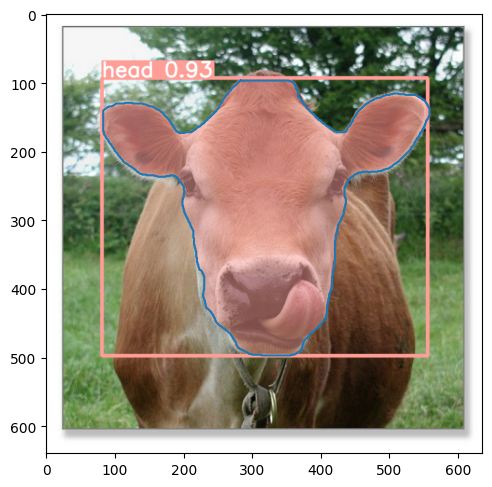

In [3]:
# code here will show the image with the limit shown in the text file


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('125d7ce5a0bbcefe93cd1d157d668988.png')


fig = plt.figure(figsize = (5,5))
plt.plot( shape(image)[0] * np.array(coordinatesx[0]), -1 * shape(image)[1]*np.array(coordinatesy[0]), )
plt.imshow(image)
plt.tight_layout()
plt.show()

(600.0, 20.0)

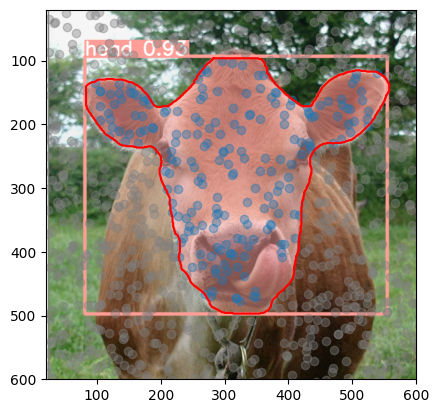

In [4]:
# the following code will generate randon 2D points and show which of them belong to the polygon defining the limits of the detection
# matplotlib path is used to determine the belonging of the points to the polygon

import matplotlib.path as mpltPath

polygon = np.array([shape(image)[0] * np.array(coordinatesx[0]), 
                    -1 * shape(image)[1]*np.array(coordinatesy[0])]).T 
N = 1000
points = np.array([shape(image)[0] * np.random.rand(N),1 * shape(image)[1] * np.random.rand(N) - 1]).T


path = mpltPath.Path(polygon)
inside2 = path.contains_points(points)

plt.scatter(np.array([x[0] for x in points])[inside2 == True], np.array([x[1] for x in points])[inside2 == True], alpha = .4)
plt.scatter(np.array([x[0] for x in points])[inside2 == False], np.array([x[1] for x in points])[inside2 == False], color = 'gray', alpha = .4)
plt.imshow(image)
plt.plot([x[0] for x in polygon], [x[1] for x in polygon], color = 'red')
plt.xlim(20,600)
plt.ylim(600,20)